In [ ]:
!pip install shapely
!pip install google-cloud-storage

In [ ]:
!wget https://storage.googleapis.com/gcp-public-data-landsat/index.csv.gz


In [3]:
import pandas as pd

In [5]:
scenes = pd.read_csv('/content/index.csv.gz', compression='gzip', header=0, sep=',', error_bad_lines=False)

In [6]:
scenes_3months = scenes[(scenes['DATE_ACQUIRED'] > '2020-12-31')]
scenes_3months.to_csv('teste.csv',sep=',')

In [8]:
from shapely.geometry import Point, Polygon, box

def is_inside(row, coords):  
  #NORTH_LAT 	SOUTH_LAT 	WEST_LON 	EAST_LON
  # bbox = box(minx, miny, maxx, maxy)  
  bbox = (row['WEST_LON'], row['SOUTH_LAT'], row['EAST_LON'], row['NORTH_LAT']) 
  box_ = box(*bbox,ccw=True) 
  polygon = Polygon(coords) 
  return box_.contains(polygon)
  

coords = [(-46.963139204545477, -22.594447352893251),( -47.030752840909123, -22.50261660811465),( -46.921377840909116, -22.32613071497479),( -46.732457386363677, -22.46770491688786),( -46.440127840909135, -22.59811931085020), ( -46.595241477272772, -22.91353996302501), ( -47.074502840909112, -22.77975855834901), ( -46.963139204545477, -22.59444735289325) ]
scenes_filtered = scenes_3months.loc[scenes_3months.apply(is_inside,coords=coords, axis=1)]

scenes_filtered.shape[0]

18

In [11]:
import os

#credencial google cloud
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/My Project 99046-67e6e1d715c6.json"

# 1.1

In [ ]:
from google.cloud import storage
import os

def download(url):  
  client = storage.Client()
  bucket = client.get_bucket('gcp-public-data-landsat')
  path = '/'.join(url.split('/')[3:])
  filename = url.split('/')[-1]
  bands = [f'{str(path)}/{str(filename)}_B{str(x)}.TIF'  for x in range(2,6)]
  for band in bands:
    if bands is not None:
      blob = bucket.blob(band)
      try:
       path = os.path.basename(str(blob.name))
       blob.download_to_filename(path)
       return path
      except Exception as e:
        print(f'ERRO: {e},{band}') 
        return None
    else:
      print(f'Erro na band: {band}')
      return None

scenes_filtered['IMAGE_PATH'] = scenes_filtered['BASE_URL'].apply(download)
scenes_filtered.to_csv('cenas.csv',sep=",")

In [51]:
# !rm *.TIF

# 1.2

In [17]:
coords = { "type": "FeatureCollection", "name": "pontos", "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84"} }, "features": [ { "type": "Feature", "properties": { "id": 1}, "geometry": { "type": "Point", "coordinates": [ -46.928338068181844, -22.448407838003366] } }, { "type": "Feature", "properties": { "id": 2}, "geometry": { "type": "Point", "coordinates": [ -46.854758522727309, -22.574249833907416] } }, { "type": "Feature", "properties": { "id": 3}, "geometry": { "type": "Point", "coordinates":[ -46.707599431818217, -22.745834173150335] } }, { "type": "Feature", "properties": { "id": 4}, "geometry": { "type": "Point", "coordinates": [ -46.936292613636397, -22.758671418151888] } }, { "type": "Feature", "properties": { "id": 5}, "geometry": { "type": "Point", "coordinates": [ -47.042684659090931, -22.603627064133512] } }, { "type": "Feature", "properties": { "id": 6}, "geometry": { "type": "Point", "coordinates": [ -47.164985795454569, -22.229520356490788] } }, { "type": "Feature", "properties": { "id": 7}, "geometry": { "type": "Point", "coordinates": [ -46.703622159090948, -22.610052497708061] } }, { "type": "Feature", "properties": { "id": 8}, "geometry": { "type": "Point", "coordinates": [ -46.753338068181854, -22.522824613704639] } }, { "type": "Feature", "properties": { "id": 9}, "geometry": { "type": "Point", "coordinates": [ -46.822940340909128, -22.748585112905488] } }, { "type": "Feature", "properties": { "id": 10}, "geometry": { "type": "Point", "coordinates": [ -46.87762784090912, -22.66328025422856] } }, { "type": "Feature", "properties": { "id": 11}, "geometry": { "type": "Point", "coordinates": [ -46.586292613636402, -22.656857309069338] } }, { "type": "Feature", "properties": { "id": 12}, "geometry": { "type": "Point", "coordinates": [ -46.988991477272755, -22.59261133718902] } }, { "type": "Feature", "properties": { "id": 13}, "geometry": { "type": "Point", "coordinates": [ -46.683735795454581,-22.836585915358484] } } ] }

In [ ]:
from shapely.geometry import Point, Polygon, box
from datetime import datetime

def ndvi_check(row, geojson, begin, end):
  features = geojson['features']
  for feature in features:
    coordinates = feature['geometry']['coordinates'] 
    bbox = (row['WEST_LON'], row['SOUTH_LAT'], row['EAST_LON'], row['NORTH_LAT'])  
    polygon = box(*bbox, ccw=True) 
    point = Point(coordinates[0], coordinates[1])
    if polygon.contains(point) and row['IMAGE_PATH'] is not None and begin >=  pd.to_datetime(row['DATE_ACQUIRED']) <= end:
      print(f"Imagem disponível para a localização Path:{row['IMAGE_PATH']}")
      return True
    else:
      print('Imagem não disponivel para a localização')

begin = datetime.strptime('2020-12-31 00:00:00', '%Y-%m-%d 00:00:00')
end = datetime.strptime('2021-03-31 00:00:00', '%Y-%m-%d 00:00:00')

#faz dowload das cenas armazenadas no dataframe
scenes_filtered.apply(ndvi_check,geojson=coords,begin=begin,end=end, axis=1)  

# 1.3

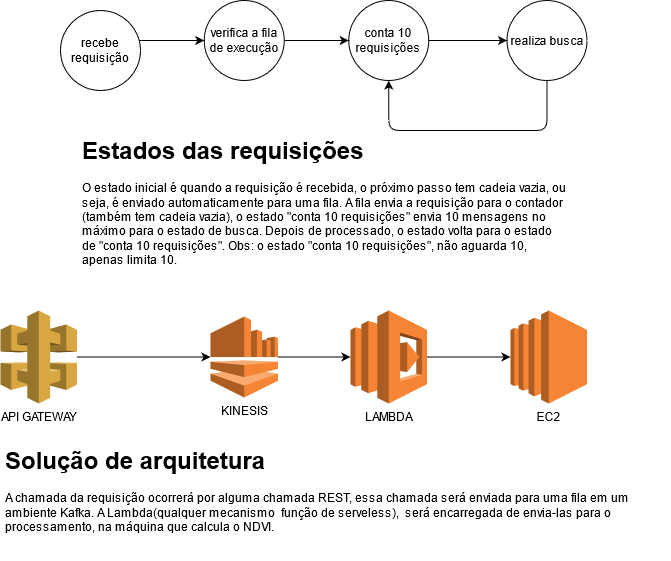

# 1.4
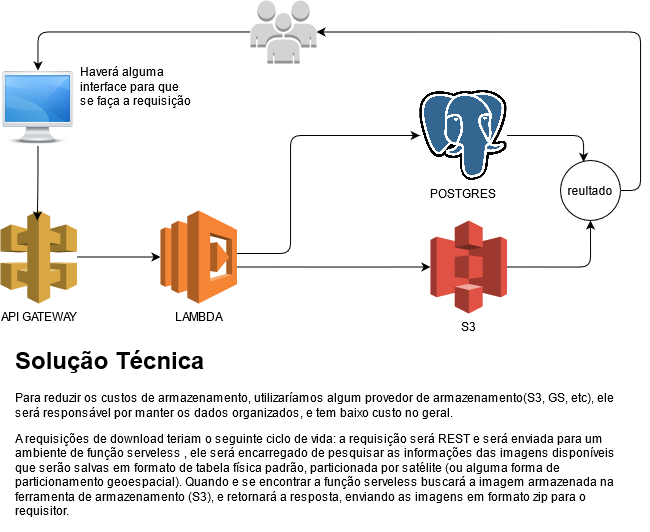

# 1.5

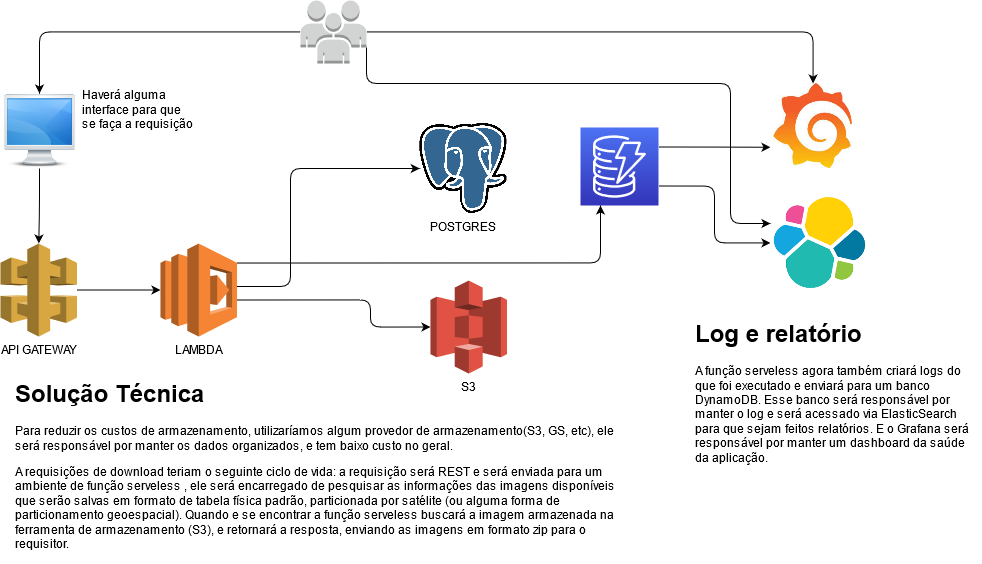